<ipython-input-1-416bab00029a>:73: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
<ipython-input-1-416bab00029a>:92: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
<ipython-input-1-416bab00029a>:111: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
<ipython-input-1-416bab00029a>:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


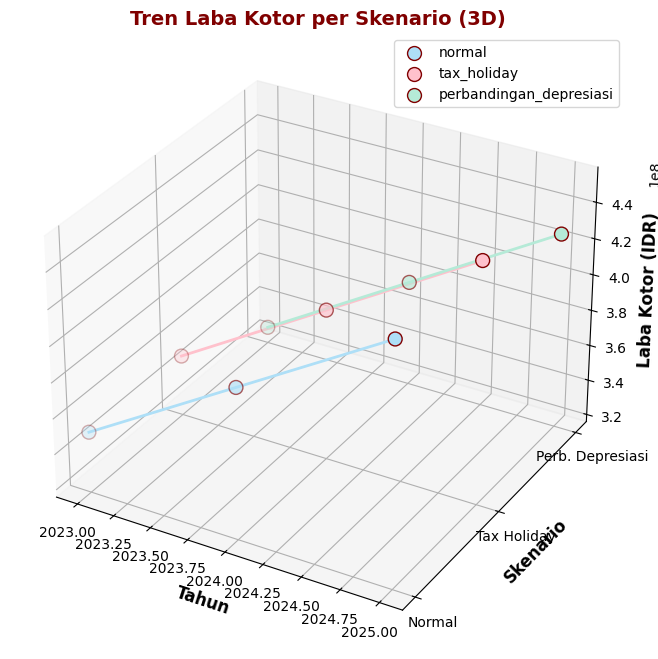

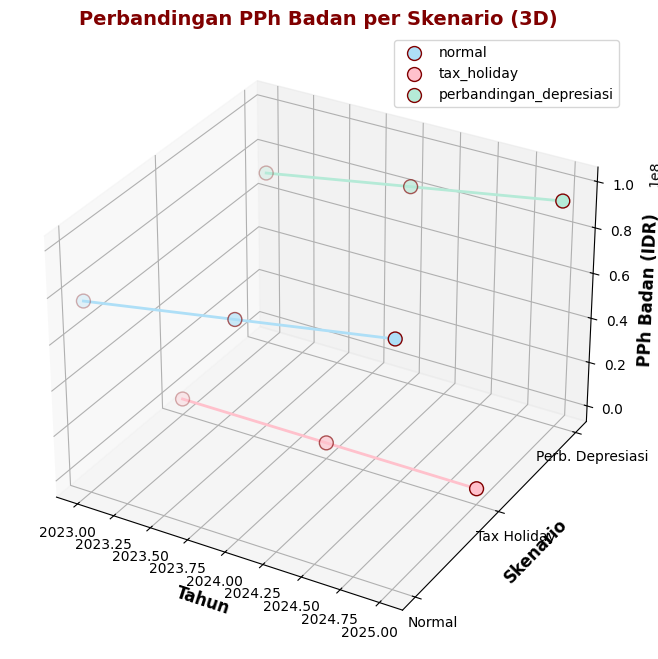

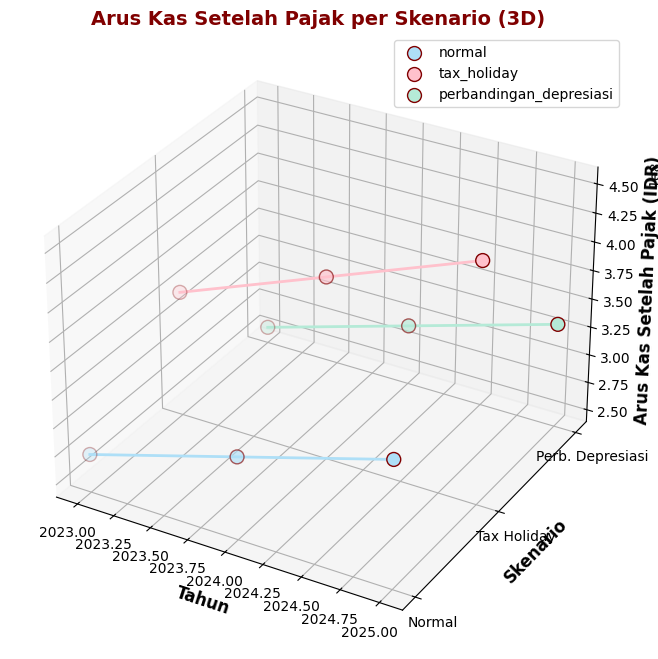

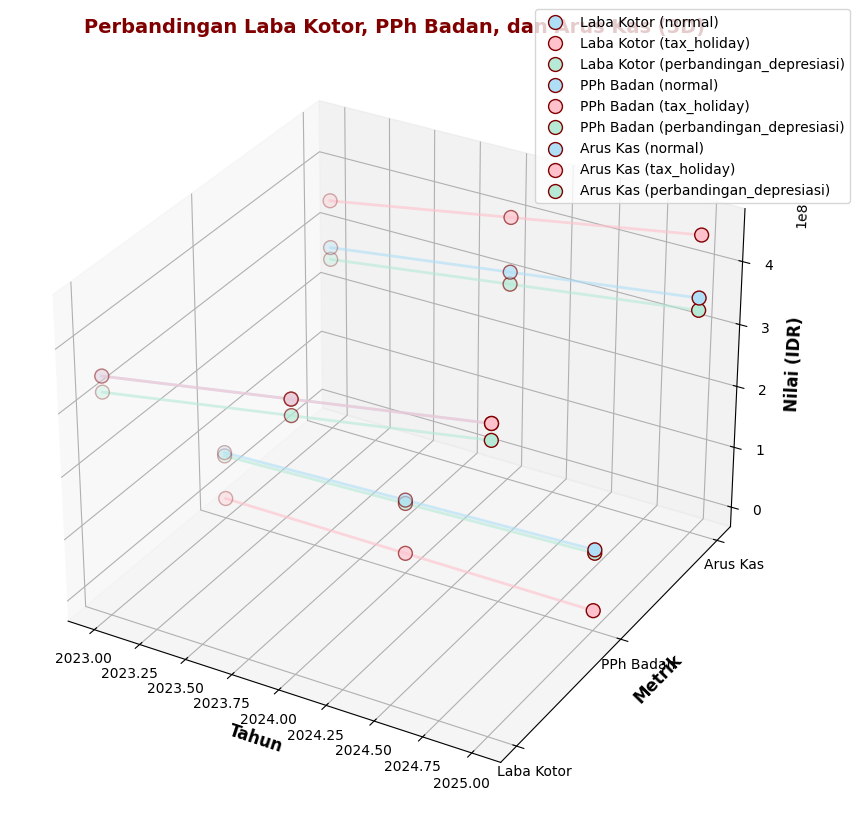

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Data dari hasil query sebelumnya
data_laba_kotor = {
    'tahun': [2023, 2023, 2023, 2024, 2024, 2024, 2025, 2025, 2025],
    'skenario': ['normal', 'tax_holiday', 'perbandingan_depresiasi',
                 'normal', 'tax_holiday', 'perbandingan_depresiasi',
                 'normal', 'tax_holiday', 'perbandingan_depresiasi'],
    'laba_kotor': [350000000, 350000000, 325000000,
                   400000000, 400000000, 375000000,
                   450000000, 450000000, 425000000]
}

data_pph = {
    'tahun': [2023, 2023, 2023, 2024, 2024, 2024, 2025, 2025, 2025],
    'skenario': ['normal', 'tax_holiday', 'perbandingan_depresiasi',
                 'normal', 'tax_holiday', 'perbandingan_depresiasi',
                 'normal', 'tax_holiday', 'perbandingan_depresiasi'],
    'pph_badan': [77000000, 0, 71500000,
                  88000000, 0, 82500000,
                  99000000, 0, 93500000]
}

data_arus_kas = {
    'tahun': [2023, 2023, 2023, 2024, 2024, 2024, 2025, 2025, 2025],
    'skenario': ['normal', 'tax_holiday', 'perbandingan_depresiasi',
                 'normal', 'tax_holiday', 'perbandingan_depresiasi',
                 'normal', 'tax_holiday', 'perbandingan_depresiasi'],
    'arus_kas_setelah_pajak': [273000000, 350000000, 253500000,
                               312000000, 400000000, 292500000,
                               351000000, 450000000, 331500000]
}

# Buat DataFrame
df_laba_kotor = pd.DataFrame(data_laba_kotor)
df_pph = pd.DataFrame(data_pph)
df_arus_kas = pd.DataFrame(data_arus_kas)

# Konversi skenario ke nilai numerik untuk sumbu Y
skenario_map = {'normal': 0, 'tax_holiday': 1, 'perbandingan_depresiasi': 2}
df_laba_kotor['skenario_num'] = df_laba_kotor['skenario'].map(skenario_map)
df_pph['skenario_num'] = df_pph['skenario'].map(skenario_map)
df_arus_kas['skenario_num'] = df_arus_kas['skenario'].map(skenario_map)

# Warna pastel
colors = {'normal': '#AEDFF7', 'tax_holiday': '#FFC1CC', 'perbandingan_depresiasi': '#B5EAD7'}
maroon = '#800000'

# Fungsi format mata uang IDR
def format_idr(value):
    return f"Rp {value:,.0f}"

# 1. Grafik Tren Laba Kotor (3D)
fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')
for skenario in skenario_map:
    df_skenario = df_laba_kotor[df_laba_kotor['skenario'] == skenario]
    ax1.scatter(df_skenario['tahun'], df_skenario['skenario_num'], df_skenario['laba_kotor'],
                c=colors[skenario], label=skenario, s=100, edgecolor=maroon)
    ax1.plot(df_skenario['tahun'], df_skenario['skenario_num'], df_skenario['laba_kotor'],
             c=colors[skenario], linewidth=2)
ax1.set_xlabel('Tahun', fontsize=12, fontweight='bold')
ax1.set_ylabel('Skenario', fontsize=12, fontweight='bold')
ax1.set_zlabel('Laba Kotor (IDR)', fontsize=12, fontweight='bold')
ax1.set_yticks([0, 1, 2])
ax1.set_yticklabels(['Normal', 'Tax Holiday', 'Perb. Depresiasi'])
ax1.set_title('Tren Laba Kotor per Skenario (3D)', fontsize=14, fontweight='bold', color=maroon)
ax1.legend()
ax1.grid(True, color='#D3D3D3')
plt.tight_layout()

# 2. Grafik Perbandingan PPh (3D)
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')
for skenario in skenario_map:
    df_skenario = df_pph[df_pph['skenario'] == skenario]
    ax2.scatter(df_skenario['tahun'], df_skenario['skenario_num'], df_skenario['pph_badan'],
                c=colors[skenario], label=skenario, s=100, edgecolor=maroon)
    ax2.plot(df_skenario['tahun'], df_skenario['skenario_num'], df_skenario['pph_badan'],
             c=colors[skenario], linewidth=2)
ax2.set_xlabel('Tahun', fontsize=12, fontweight='bold')
ax2.set_ylabel('Skenario', fontsize=12, fontweight='bold')
ax2.set_zlabel('PPh Badan (IDR)', fontsize=12, fontweight='bold')
ax2.set_yticks([0, 1, 2])
ax2.set_yticklabels(['Normal', 'Tax Holiday', 'Perb. Depresiasi'])
ax2.set_title('Perbandingan PPh Badan per Skenario (3D)', fontsize=14, fontweight='bold', color=maroon)
ax2.legend()
ax2.grid(True, color='#D3D3D3')
plt.tight_layout()

# 3. Grafik Arus Kas Setelah Pajak (3D)
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, projection='3d')
for skenario in skenario_map:
    df_skenario = df_arus_kas[df_arus_kas['skenario'] == skenario]
    ax3.scatter(df_skenario['tahun'], df_skenario['skenario_num'], df_skenario['arus_kas_setelah_pajak'],
                c=colors[skenario], label=skenario, s=100, edgecolor=maroon)
    ax3.plot(df_skenario['tahun'], df_skenario['skenario_num'], df_skenario['arus_kas_setelah_pajak'],
             c=colors[skenario], linewidth=2)
ax3.set_xlabel('Tahun', fontsize=12, fontweight='bold')
ax3.set_ylabel('Skenario', fontsize=12, fontweight='bold')
ax3.set_zlabel('Arus Kas Setelah Pajak (IDR)', fontsize=12, fontweight='bold')
ax3.set_yticks([0, 1, 2])
ax3.set_yticklabels(['Normal', 'Tax Holiday', 'Perb. Depresiasi'])
ax3.set_title('Arus Kas Setelah Pajak per Skenario (3D)', fontsize=14, fontweight='bold', color=maroon)
ax3.legend()
ax3.grid(True, color='#D3D3D3')
plt.tight_layout()

# 4. Grafik Perbandingan Ketiga Metrik (3D)
# Gabungkan data untuk perbandingan
data_perbandingan = []
for tahun in [2023, 2024, 2025]:
    for skenario in skenario_map:
        laba = df_laba_kotor[(df_laba_kotor['tahun'] == tahun) & (df_laba_kotor['skenario'] == skenario)]['laba_kotor'].iloc[0]
        pph = df_pph[(df_pph['tahun'] == tahun) & (df_pph['skenario'] == skenario)]['pph_badan'].iloc[0]
        arus_kas = df_arus_kas[(df_arus_kas['tahun'] == tahun) & (df_arus_kas['skenario'] == skenario)]['arus_kas_setelah_pajak'].iloc[0]
        data_perbandingan.extend([
            {'tahun': tahun, 'skenario': skenario, 'metrik': 'Laba Kotor', 'nilai': laba},
            {'tahun': tahun, 'skenario': skenario, 'metrik': 'PPh Badan', 'nilai': pph},
            {'tahun': tahun, 'skenario': skenario, 'metrik': 'Arus Kas', 'nilai': arus_kas}
        ])

df_perbandingan = pd.DataFrame(data_perbandingan)
df_perbandingan['skenario_num'] = df_perbandingan['skenario'].map(skenario_map)
metrik_map = {'Laba Kotor': 0, 'PPh Badan': 1, 'Arus Kas': 2}
df_perbandingan['metrik_num'] = df_perbandingan['metrik'].map(metrik_map)

# Plot perbandingan
fig4 = plt.figure(figsize=(12, 10))
ax4 = fig4.add_subplot(111, projection='3d')
for metrik in metrik_map:
    df_metrik = df_perbandingan[df_perbandingan['metrik'] == metrik]
    for skenario in skenario_map:
        df_skenario = df_metrik[df_metrik['skenario'] == skenario]
        ax4.scatter(df_skenario['tahun'], df_skenario['metrik_num'], df_skenario['nilai'],
                    c=colors[skenario], label=f'{metrik} ({skenario})', s=100, edgecolor=maroon)
        ax4.plot(df_skenario['tahun'], df_skenario['metrik_num'], df_skenario['nilai'],
                 c=colors[skenario], linewidth=2, alpha=0.6)
ax4.set_xlabel('Tahun', fontsize=12, fontweight='bold')
ax4.set_ylabel('Metrik', fontsize=12, fontweight='bold')
ax4.set_zlabel('Nilai (IDR)', fontsize=12, fontweight='bold')
ax4.set_yticks([0, 1, 2])
ax4.set_yticklabels(['Laba Kotor', 'PPh Badan', 'Arus Kas'])
ax4.set_title('Perbandingan Laba Kotor, PPh Badan, dan Arus Kas (3D)', fontsize=14, fontweight='bold', color=maroon)
ax4.legend(bbox_to_anchor=(1.1, 1.05))
ax4.grid(True, color='#D3D3D3')
plt.tight_layout()

# Tampilkan semua grafik
plt.show()